# pycocoDemo.ipynb 
https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

In [19]:

from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os

coco = COCO('D:\Data\AI604_project\covid-chestxray-segmentations\\annotation\\results.json')

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [20]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' /'.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' /'.join(nms)))

COCO categories: 
Airways /Cardiomediastinum /Ground Glass Opacities /Right Lung /Left Lung /Consolidation /Pleural Effusion /Central Venous Line /Endotracheal Tube /Tubings /Monitoring Probes /Nosogastric Tube /Pneumothorax

COCO supercategories: 
COVID-19 Consolidation /COVID-19 Left Lung /COVID-19 Monitoring Probes /COVID-19 Ground Glass Opacities /COVID-19 Tubings /COVID-19 Airways /COVID-19 Nosogastric Tube /COVID-19 Pleural Effusion /COVID-19 Endotracheal Tube /COVID-19 Central Venous Line /COVID-19 Right Lung /COVID-19 Cardiomediastinum /COVID-19 Pneumothorax


In [21]:
catIds = coco.getCatIds(catNms=['Right Lung'])
print(catIds)
imgIds = coco.getImgIds(catIds=catIds)
print(imgIds)

[4]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [22]:
img = coco.loadImgs(imgIds[5])[0]
img

{'license': 1,
 'file_name': 'SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg',
 'height': 1546,
 'width': 1800,
 'microwork_url': 'https://storage.googleapis.com/microwork-prod/images/57af7547bae1827c0aa1374885808eb876dc5b6f.jpg?GoogleAccessId=microwork-apps%40microwork-production.iam.gserviceaccount.com&Expires=1595072183&Signature=NX1XK0jcIdsK0MrDoPrLxH0ZLbUDCvqBd3LGJFfk3JeCUpQXjQf9fGQdwtuJyTr6ur4M0vgc6bV%2Bq27ADhbYZDXLYjBO92S8%2BL8R93HN0WhXdlQvEQHpOBEC5TrIpoJ8IMrqaxjKe%2F%2FhJfVQGMqGdeJJR8zOH1QKd1qMlXGlmLIcuE0VEksNt%2FQwGQ6pnysfdTkpOqL3XAyxeHOTgCrf0ht7m4xOuDXgyCe6pgizIGyVHKRKP8Hzy7FiXhRVMcmUkkBBVVvVj6gWzMEhjmvI00ckKH7usrFScZmYOXbfwZCWSaoizBZGCpKOOg3%2FcwxUk0ULuKYGrGlpoE13lrzIWg%3D%3D',
 'id': 6}

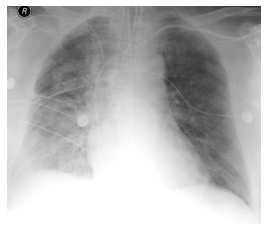

In [23]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image

img_dir = 'D:\Data\AI604_project\covid-chestxray-segmentations\images'

I = io.imread(os.path.join(img_dir, img['file_name']))
plt.axis('off')
plt.imshow(I, cmap="gray")
plt.show()

In [24]:
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
annIds

[29, 30, 31, 32, 33, 34, 35, 36]

In [27]:
anns = coco.loadAnns(annIds)
anns

[{'segmentation': {'counts': [837,
    114,
    72,
    1492,
    122,
    114,
    72,
    1492,
    122,
    114,
    72,
    1492,
    122,
    114,
    72,
    1492,
    122,
    114,
    72,
    1492,
    122,
    114,
    72,
    1492,
    123,
    113,
    72,
    1492,
    123,
    113,
    72,
    1492,
    123,
    113,
    72,
    1492,
    123,
    113,
    72,
    1492,
    123,
    113,
    72,
    1492,
    123,
    113,
    72,
    1492,
    123,
    113,
    72,
    1492,
    124,
    112,
    72,
    1492,
    124,
    112,
    72,
    1492,
    124,
    112,
    72,
    1492,
    124,
    112,
    72,
    1492,
    124,
    112,
    72,
    1492,
    124,
    112,
    72,
    1492,
    124,
    112,
    72,
    1492,
    124,
    112,
    72,
    1492,
    124,
    112,
    72,
    1492,
    124,
    112,
    72,
    1492,
    124,
    112,
    72,
    1492,
    124,
    112,
    72,
    1492,
    124,
    112,
    72,
    1492,
    124,
    112,
    72,
    1492,
  

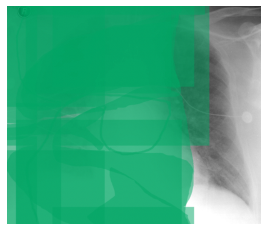

In [28]:
# load and display instance annotations
plt.imshow(I, cmap="gray"); plt.axis('off')
#annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
#anns = coco.loadAnns(annIds)
coco.showAnns(anns)

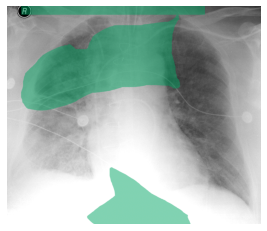

In [29]:
# load and display instance annotations
plt.imshow(I, cmap="gray"); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds[4]) # Right Lung
coco.showAnns(anns)

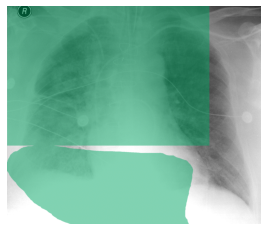

In [30]:
# load and display instance annotations
plt.imshow(I, cmap="gray"); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds[5]) # Left Lung
coco.showAnns(anns)